In [ ]:
import statsmodels.tsa.api as smtsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore") 
import sklearn as sk
import pandas as pd
import math as math
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as skm
import seaborn as sns 
import itertools as it
%matplotlib inline 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#functions

#find trend
def find_trend(timeseries):
  trend = timeseries.rolling(window=12, center=True, min_periods=6).mean()

  fig, ax = plt.subplots()
  ax.plot(timeseries)
  ax.plot(trend)
  ax.set_title("Trend of Timeseries against Timeseries")
  plt.show()
  return trend

#test trend with ADF
def test_ADF(timeseries):
  print('Checking if data is stationary')
  adf_results = adfuller(timeseries.dropna(), autolag='AIC')
  print('Test Statistic:', adf_results[0])
  print('P-value:', adf_results[1])
  print('Critical Values :', adf_results[4])
  for key, values in adf_results[4].items():
    if values > adf_results[0] and 0.05 > adf_results[1] :
      print('Test statistic', adf_results[0], 'give stationarity with confidence percentile', 100-int(key[:-1]))
    else:
      print('Test statistic', adf_results[0], 'is greater then the critical value')

In [ ]:
airline_df = pd.read_csv("AirPassengers.csv")

airline_df.Month = airline_df.Month.astype('datetime64[ns]')
airline_df_2 = airline_df.set_index(pd.to_datetime(airline_df.Month))

airline_df_2.head()

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


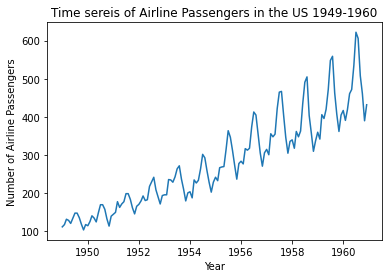

In [ ]:
plt.plot(airline_df_2['#Passengers'])
plt.xlabel("Year")
plt.ylabel("Number of Airline Passengers")
plt.title("Time sereis of Airline Passengers in the US 1949-1960")
plt.show()

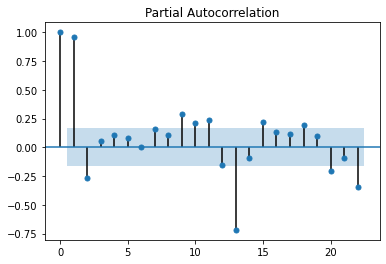

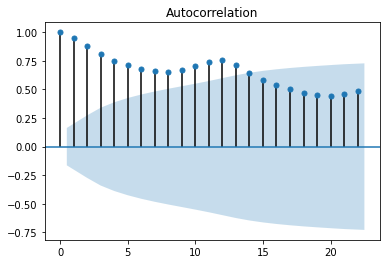

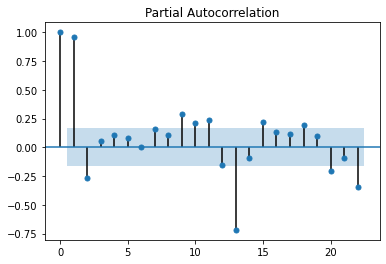

In [ ]:
plot_acf(airline_df_2['#Passengers'])
plot_pacf(airline_df_2['#Passengers'])

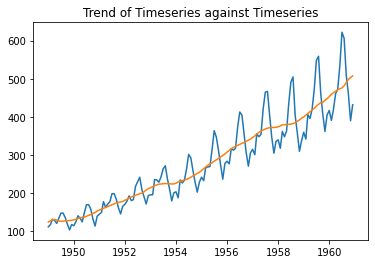

In [ ]:
trend = find_trend(airline_df_2["#Passengers"])

In [ ]:
test_ADF(airline_df_2["#Passengers"])

Checking if data is stationary
Test Statistic: 0.8153688792060472
P-value: 0.991880243437641
Critical Values : {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
Test statistic 0.8153688792060472 is greater then the critical value
Test statistic 0.8153688792060472 is greater then the critical value
Test statistic 0.8153688792060472 is greater then the critical value


Checking if data is stationary
Test Statistic: -3.113006217341483
P-value: 0.025605523361851654
Critical Values : {'1%': -3.482087964046026, '5%': -2.8842185101614626, '10%': -2.578864381347275}
Test statistic -3.113006217341483 is greater then the critical value
Test statistic -3.113006217341483 give stationarity with confidence percentile 95
Test statistic -3.113006217341483 give stationarity with confidence percentile 90


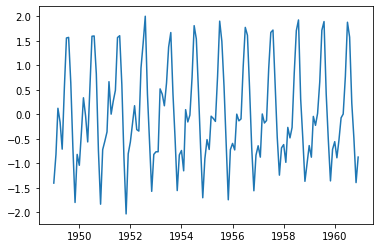

In [ ]:

airline_data_detrended = (airline_df_2['#Passengers'] - trend)/airline_df_2['#Passengers'].rolling(window =12, center=True, min_periods=6).std()

test_ADF(airline_data_detrended)

plt.plot(airline_data_detrended)
plt.show()

In [ ]:

train = airline_data_detrended[:'1959-12-01']
test = airline_data_detrended['1960-01-01':]

from collections import defaultdict

print(test)
#create dictionary of AIC results to store to find best AIC
dict_AIC = defaultdict(list)
#prepare SARIMAX model
p = d = q = range(0, 2)
print(p)
seasonal_period = 12
pdq = list(it.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(it.product(p, d, q))]

for order in pdq:
    for seasonal_order in seasonal_pdq:
        try:
            SARIMAX_model = smtsa.SARIMAX(train,
                          order=order,
                          seasonal_order=seasonal_order,
                          enforce_invertibility=False)
            results = SARIMAX_model.fit()
            print('ARIMA', order, seasonal_order, "AIC:", results.aic)
            dict_AIC[order,seasonal_order].append(results.aic)
        except Exception as e:
            print(e)
            continue

Month
1960-01-01   -0.557505
1960-02-01   -0.886289
1960-03-01   -0.530110
1960-04-01   -0.071892
1960-05-01    0.005048
1960-06-01    0.768321
1960-07-01    1.875981
1960-08-01    1.572294
1960-09-01    0.225393
1960-10-01   -0.485142
1960-11-01   -1.391701
1960-12-01   -0.871976
Name: #Passengers, dtype: float64
range(0, 2)
ARIMA (0, 0, 0) (0, 0, 0, 12) AIC: 372.10678206391924
ARIMA (0, 0, 0) (0, 0, 1, 12) AIC: 256.20993322406355
ARIMA (0, 0, 0) (0, 1, 0, 12) AIC: 2.663981331584553
ARIMA (0, 0, 0) (0, 1, 1, 12) AIC: -17.433349735062244
ARIMA (0, 0, 0) (1, 0, 0, 12) AIC: 36.90466435017021
ARIMA (0, 0, 0) (1, 0, 1, 12) AIC: 17.915626298552965
ARIMA (0, 0, 0) (1, 1, 0, 12) AIC: -11.575802287365654
ARIMA (0, 0, 0) (1, 1, 1, 12) AIC: -16.09824563364038
ARIMA (0, 0, 1) (0, 0, 0, 12) AIC: 283.1645813223177
ARIMA (0, 0, 1) (0, 0, 1, 12) AIC: 198.49257357033278
ARIMA (0, 0, 1) (0, 1, 0, 12) AIC: 0.05837699563157228
ARIMA (0, 0, 1) (0, 1, 1, 12) AIC: -19.977636178262504
ARIMA (0, 0, 1) (1, 0, 

In [ ]:
print(dict_AIC)
min_AIC_order = min(dict_AIC, key=dict_AIC.get)
print(min_AIC_order)

defaultdict(<class 'list'>, {((0, 0, 0), (0, 0, 0, 12)): [372.10678206391924], ((0, 0, 0), (0, 0, 1, 12)): [256.20993322406355], ((0, 0, 0), (0, 1, 0, 12)): [2.663981331584553], ((0, 0, 0), (0, 1, 1, 12)): [-17.433349735062244], ((0, 0, 0), (1, 0, 0, 12)): [36.90466435017021], ((0, 0, 0), (1, 0, 1, 12)): [17.915626298552965], ((0, 0, 0), (1, 1, 0, 12)): [-11.575802287365654], ((0, 0, 0), (1, 1, 1, 12)): [-16.09824563364038], ((0, 0, 1), (0, 0, 0, 12)): [283.1645813223177], ((0, 0, 1), (0, 0, 1, 12)): [198.49257357033278], ((0, 0, 1), (0, 1, 0, 12)): [0.05837699563157228], ((0, 0, 1), (0, 1, 1, 12)): [-19.977636178262504], ((0, 0, 1), (1, 0, 0, 12)): [31.034103192905903], ((0, 0, 1), (1, 0, 1, 12)): [12.319143714331993], ((0, 0, 1), (1, 1, 0, 12)): [-13.24244025963285], ((0, 0, 1), (1, 1, 1, 12)): [-19.02097512206017], ((0, 1, 0), (0, 0, 0, 12)): [313.0588849976732], ((0, 1, 0), (0, 0, 1, 12)): [217.74317347919512], ((0, 1, 0), (0, 1, 0, 12)): [54.681527952573866], ((0, 1, 0), (0, 1, 1,

1960-01-01   -0.595164
1960-02-01   -0.874415
1960-03-01   -0.074702
1960-04-01   -0.262213
1960-05-01   -0.086910
1960-06-01    0.769169
1960-07-01    1.712122
1960-08-01    1.831000
1960-09-01    0.427889
1960-10-01   -0.515103
1960-11-01   -1.384999
1960-12-01   -0.796316
Freq: MS, dtype: float64


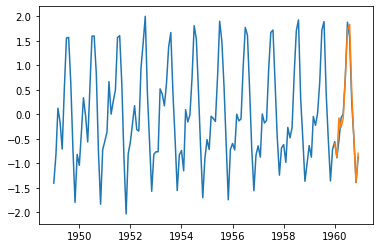

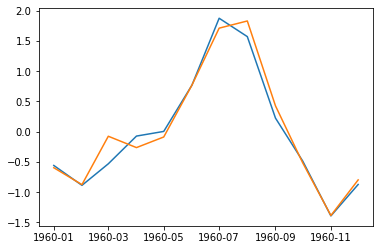

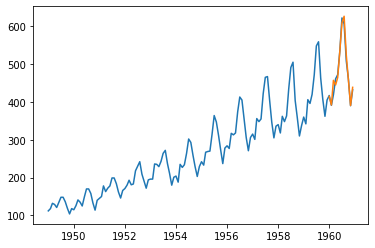

In [ ]:
order = (1, 0, 0)
seasonal_order = (0, 1, 1, 12)

SARIMA_model_best = smtsa.SARIMAX(train, order=order, seasonal_order=seasonal_order,enforce_invertibility=False)
best_results = SARIMA_model_best.fit()
print(best_results)

SARIMA_pred = best_results.forecast(steps=12)
print(SARIMA_pred)

fig, ax = plt.subplots()
ax.plot(airline_data_detrended)
ax.plot(SARIMA_pred)
plt.show()

fig, ax = plt.subplots()
ax.plot(airline_data_detrended['1960-01-01':])
ax.plot(SARIMA_pred)
plt.show()

recompose_data = SARIMA_pred * airline_df_2['#Passengers'].rolling(window=12, center=True, min_periods=6).std() + trend
recompose_data_2 = recompose_data.dropna()

test_rescaled = airline_df_2['#Passengers']['1960-01-01':]

fig, ax = plt.subplots()
ax.plot(airline_df_2.index, airline_df_2['#Passengers'])
ax.plot(recompose_data_2)
plt.show()



In [ ]:
rmse = skm.mean_squared_error(test_rescaled,SARIMA_pred, squared=False)
print("Root Mean squared error for 12 forecast steps:", rmse)
mape = skm.mean_absolute_percentage_error(test_rescaled,SARIMA_pred)
print("Mean absolute percentage error for 12 forecast steps:", mape)

Root Mean squared error for 12 forecast steps: 481.79387735957636
Mean absolute percentage error for 12 forecast steps: 1.0002543933781136
